# Task 1:
a. Create a NumPy array named arr with shape (3, 4) containing integers from 1 to 12.

b. Calculate and print the maximum, and minimum values of the array. Define a function that can calculate both. (Don't use inbuilt functions)

c. Access and modify some elements of the same array defined above to see the changes in min and max values.


In [2]:
import numpy as np

# Creating a NumPy array named arr with shape (3, 4) containing integers from 1 to 12
arr = np.arange(1, 13).reshape(3, 4)

print("Original array:")
print(arr)

Original array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [3]:
# Function to calculate both maximum and minimum values without using inbuilt functions
def calculate_max_min(array):
    max_val = array[0, 0]
    min_val = array[0, 0]

    for row in range(array.shape[0]):
        for col in range(array.shape[1]):
            if array[row, col] > max_val:
                max_val = array[row, col]
            elif array[row, col] < min_val:
                min_val = array[row, col]

    return max_val, min_val

In [4]:
# Calculate and print the maximum and minimum values of the array using the function
max_value, min_value = calculate_max_min(arr)
print("\nMaximum value (without using inbuilt functions):", max_value)
print("Minimum value (without using inbuilt functions):", min_value)

# Access and modify some elements of the array to see changes in min and max values
arr[1, 2] = 20
arr[2, 3] = -5

# Recalculate and print the maximum and minimum values after modification
max_value, min_value = calculate_max_min(arr)
print("\nModified array:")
print(arr)
print("\nMaximum value after modification:", max_value)
print("Minimum value after modification:", min_value)



Maximum value (without using inbuilt functions): 12
Minimum value (without using inbuilt functions): 1

Modified array:
[[ 1  2  3  4]
 [ 5  6 20  8]
 [ 9 10 11 -5]]

Maximum value after modification: 20
Minimum value after modification: -5


# Task 2:
a. Develop a Python program to classify a set of sample data points into two classes, "Class 0" and "Class 1," using the Rectified Linear Unit (ReLU) function. The ReLU function works by assigning data points to value "0" if the input is less than or equal to zero and to "original data point value" if the input is greater than zero. 

b. The program should visualize the classified data points using a scatter plot.

Hint: Use functions, conditional statements, loops
ReLU:
f(x)=max(0,x)


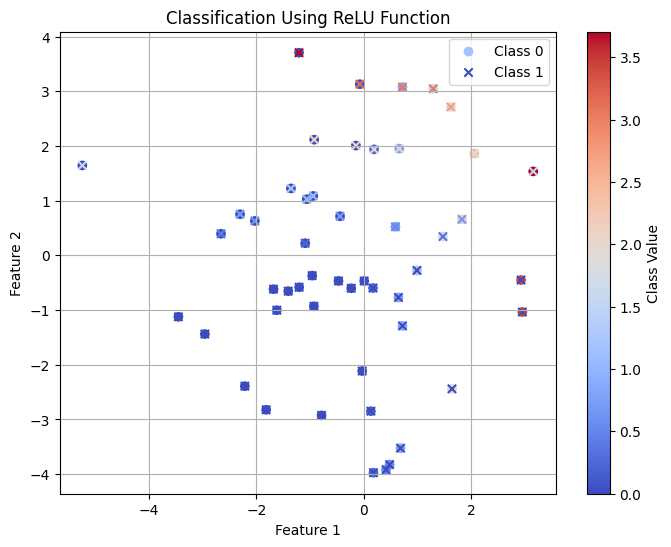

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Rectified Linear Unit (ReLU)
def relu(x):
    return np.maximum(0, x)

# Generate sample data points
np.random.seed(42)
data_points = np.random.randn(50, 2) * 2  # 50 data points with 2 features

# Classify data points using ReLU function
class_0 = relu(data_points[:, 0])
class_1 = relu(data_points[:, 1])

# Visualize the classified data points using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c=class_0, cmap='coolwarm', label='Class 0', marker='o')
plt.scatter(data_points[:, 0], data_points[:, 1], c=class_1, cmap='coolwarm', label='Class 1', marker='x')

plt.title('Classification Using ReLU Function')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Class Value')
plt.grid(True)
plt.show()


# Task 3:
Create a checkerboard pattern grayscale image using NumPy and OpenCV

In [18]:
import numpy as np
def make_checkerboard(w, h, sq, fore_color, back_color):
    """
    Creates a checkerboard pattern image
    :param w: The width of the image desired
    :param h: The height of the image desired
    :param sq: The size of the square for the checker pattern
    :param fore_color: The foreground color
    :param back_color: The background color
    :return:
    """
    w_rem = np.mod(w, sq)
    h_rem = np.mod(w, sq)
    if w_rem != 0 or h_rem != 0:
        raise ValueError('Width or height is not evenly divisible by square '
                         'size.')
    img = np.zeros((h, w, 3), dtype='uint8')
    x_divs = w // sq
    y_divs = h // sq
    fore_tile = np.ones((sq, sq, 3), dtype='uint8')
    fore_tile *= np.array([[fore_color]], dtype='uint8')
    back_tile = np.ones((sq, sq, 3), dtype='uint8')
    back_tile *= np.array([[back_color]], dtype='uint8')
    for y in np.arange(y_divs):
        if np.mod(y, 2):
            b = back_tile
            f = fore_tile
        else:
            b = fore_tile
            f = back_tile
        for x in np.arange(x_divs):
            if np.mod(x, 2) == 0:
                img[y * sq:y * sq + sq, x * sq:x * sq + sq] = f
            else:
                img[y * sq:y * sq + sq, x * sq:x * sq + sq] = b
    return img

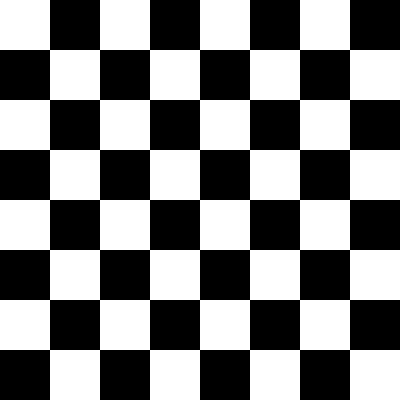

In [19]:
from google.colab.patches import cv2_imshow
width = 400
height = 400
square_size = 50
foreground_color = [0, 0, 0]  # Black
background_color = [255, 255, 255]  # White

checkerboard_img = make_checkerboard(width, height, square_size, foreground_color, background_color)

# Display the image using cv2
cv2_imshow(checkerboard_img)